In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [149]:
data=pd.read_csv('titanic.csv')

In [150]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [152]:
data=data.drop(['PassengerId','Name'],axis=1)

In [153]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0,3,male,NaN,0,0,359309,8.0500,NaN,S


In [154]:
data.duplicated().sum()

1

In [155]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [156]:
data=data.drop_duplicates()

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Ticket    417 non-null    object 
 7   Fare      416 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [158]:
data['Age'].mean()

30.272590361445783

In [159]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          85
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       326
Embarked      0
dtype: int64

In [160]:
##data['Age']=data['Age'].fillna(method='bfill',inplace=True)

In [161]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
impute=SimpleImputer(strategy='mean')

In [162]:
data['Cabin']=imputer.fit_transform(data[['Cabin']]).ravel()
data['Age']=impute.fit_transform(data[['Age']]).ravel()


In [163]:
data['Fare']=data['Fare'].fillna(data['Fare'].mean())

In [164]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [165]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,1,3,female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,0,2,male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,0,3,male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,1,3,female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1,1,female,39.00000,0,0,PC 17758,108.9000,C105,C
415,0,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,0,3,male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


<Axes: >

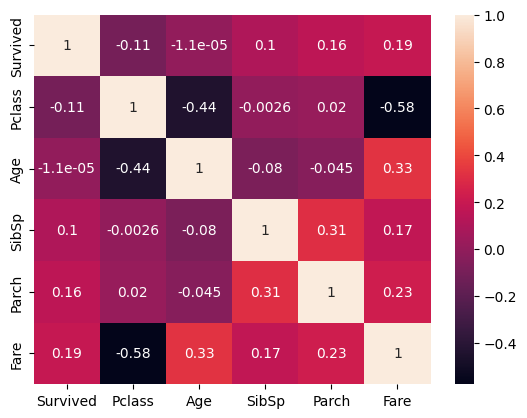

In [166]:
numeric= data.select_dtypes(include='number')
sns.heatmap(numeric.corr(),annot=True)

In [167]:
data['Family']=data['SibSp']+data['Parch']+1

In [168]:
data=data.drop(['SibSp','Parch','Ticket','Cabin'],axis=1)

<Axes: xlabel='Age'>

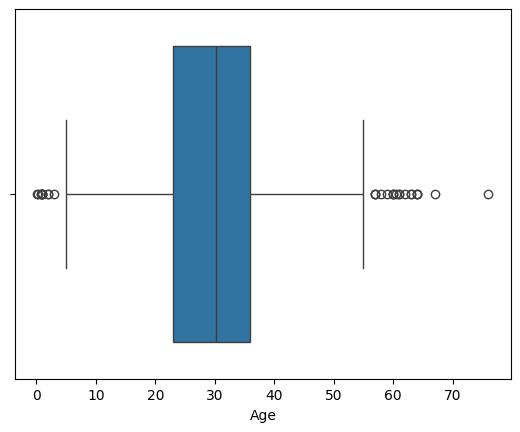

In [169]:
sns.boxplot(data,x='Age')

<Axes: xlabel='Fare'>

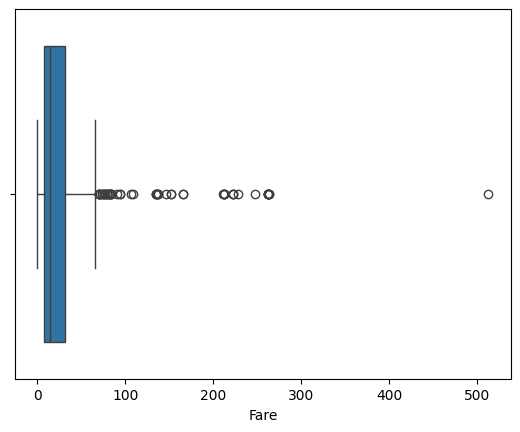

In [170]:
sns.boxplot(data,x='Fare')

In [171]:
q1=data['Age'].quantile(.25)
q3=data['Age'].quantile(.75)
iqr=q3-q1

lowerbound=q1+1.5*iqr
upperbound=q3+1.5*iqr
print(lowerbound)
print(upperbound)

data['Age']=data['Age'].apply(lambda x:lowerbound if x<lowerbound else upperbound if x>upperbound else x)
no_outliers = data[(data['Age'] >= lowerbound) & (data['Age'] <= upperbound)]

42.5
55.5


<Axes: xlabel='Age'>

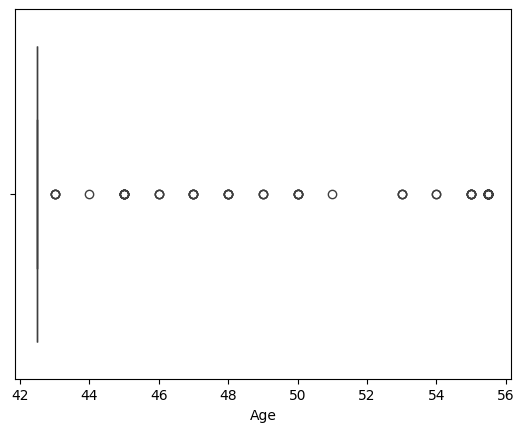

In [172]:

sns.boxplot(data,x='Age')

In [173]:
q1=data['Fare'].quantile(.25)
q3=data['Fare'].quantile(.75)
iqr=q3-q1

lowerbound=q1+1.5*iqr
upperbound=q3+1.5*iqr
print(lowerbound)
print(upperbound)

data['Fare']=data['Fare'].apply(lambda x:lowerbound if x<lowerbound else upperbound if x>upperbound else x)
no_outliers = data[(data['Fare'] >= lowerbound) & (data['Fare'] <= upperbound)]

43.3021
66.9063


<Axes: xlabel='Fare'>

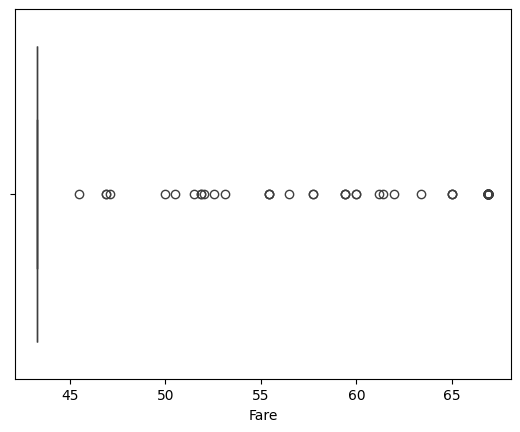

In [174]:
sns.boxplot(no_outliers,x='Fare')

In [175]:
data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [176]:
labelencoder=LabelEncoder()
data['Embarked']=labelencoder.fit_transform(data['Embarked'])
data['Sex']=labelencoder.fit_transform(data['Sex'])
##data = pd.get_dummies(data, columns=['Ticket'])


In [177]:
min_max_scaler=MinMaxScaler()
data['Age']=min_max_scaler.fit_transform(data[['Age']])
data['Fare']=min_max_scaler.fit_transform(data[['Fare']])

In [178]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,0.000000,0.0,1,1
1,1,3,0,0.346154,0.0,2,2
2,0,2,1,1.000000,0.0,1,1
3,0,3,1,0.000000,0.0,2,1
4,1,3,0,0.000000,0.0,2,3
...,...,...,...,...,...,...,...
413,0,3,1,0.000000,0.0,2,1
414,1,1,0,0.000000,1.0,0,1
415,0,3,1,0.000000,0.0,2,1
416,0,3,1,0.000000,0.0,2,1


<Axes: >

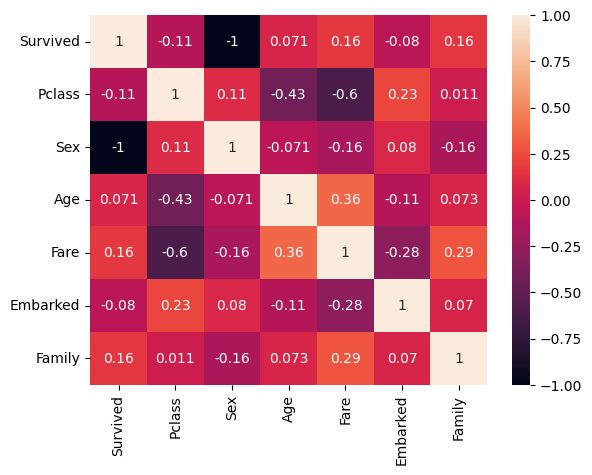

In [179]:
numeric= data.select_dtypes(include='number')
sns.heatmap(numeric.corr(),annot=True)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    int32  
 3   Age       417 non-null    float64
 4   Fare      417 non-null    float64
 5   Embarked  417 non-null    int32  
 6   Family    417 non-null    int64  
dtypes: float64(2), int32(2), int64(3)
memory usage: 22.8 KB


In [180]:
X=data.drop(columns=['Survived'])
y=data['Survived']
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [181]:
model=RandomForestClassifier(n_estimators=100,random_state=40)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=40)

In [184]:
y_predict=model.predict(X_test)

In [187]:
accuracy=accuracy_score(y_test,y_predict)
print(f"model Accuracy:{accuracy*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_predict))

model Accuracy:100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       114

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

